# Deep Learning

Es un subconjunto de Machine Learning, enfocado a Redes Neuronales profundas, que agiliza el proceso de entrenamiento al permitir que los algoritmos sean capaces de aprender las caracetrísticas importantes por si mismo.

![](imagenes/DL.jpg "")

Son algoritmos mucho más complejos, difíciles de entrenar y requieren una cantidad enorme de datos, pero son los algoritmos que mejor rendimiento tienen en la actualidad para tareas de alta complejidad como la Visión por Computadora o el Procesamiento de Lenguaje Natural. Los podemos encontrar en aplicaciones como Instagram y Facebook.

![](imagenes/DL2.jpg "")

Otro problema con los algoritmos de Deep Learning es que requieren software especializado para ser entrenados de manera efectiva. Este tipo de hardware puede ser un TPU (Tensor Processing Unit) o un GPU (Graphics Processign Unit); estós últimos son más comunes ya que son las tarjetas gráficas discretas que acompañan algunos equipos de cómputo de alto rendimiento, como workstations o computadoras gamer.

![](imagenes/cpu_vs_gpu.jpg "")

El mayor fabricante de estos dispositivos es Nvidia Corporation y tienen prácticamente el monopolio de aplicaciones de GPU a Deep Learning con sus bibliotecas CUDA para C++.

## Redes Neuronales Artificiales

Un perceptrón multicapa, es una función matemática que relaciona algún conjunto de entradas con otro conjunto de salida. Esta función se crea componiendo varias funciones más simples. Las redes tradicionales mandan datos hacia adelante a través de la red, en cada capa se aplica una transformación de las entradas y a esa salida se le aplica una transformación no lineal. Esto permite a la red construir representaciones sucesivamente más complejas de los datos.

### Breve historia

La neurona fue inventada en 1943 por McCulloch  y Pi

<https://playground.tensorflow.org/>

<https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/>

<https://towardsdatascience.com/animations-of-neural-networks-transforming-data-42005e8fffd9>

## Tensorflow y Keras


<www.tensorflow.org>
<www.keras.io>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install pycm
# !pip install livelossplot

In [3]:
%matplotlib inline
import sys
import pathlib
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from livelossplot import PlotLossesKerasTF

os.environ["CUDA_VISIBLE_DEVICES"]="1"

SEED = 199510
np.random.seed(SEED)
tf.random.set_seed(SEED)

ROOT_DIR = pathlib.Path().resolve().parent

# Descomentar para correr en Google Colab usando Drive
# ROOT_DIR = pathlib.Path("drive/MyDrive/curso_cisc_2022")
# sys.path.append("/content/drive/MyDrive/curso_cisc_2022/Notebooks")

DATA_DIR = ROOT_DIR / "Data" / "smear2005"
print(ROOT_DIR)

import utils

C:\Users\marco\Documents\Trabajo\Academia\curso_cisc_2022


In [4]:
dataset = pd.read_csv(f"{DATA_DIR}/dataset.csv")
CLASS_COLUMN = "Class_cat_7"

In [5]:
class_names = dataset[CLASS_COLUMN].unique()
num_classes = len(class_names)
print(f"Número de clases: {num_classes}")
print(f"Clases: {class_names}")

Numero de clases: 7
Clases: ['normal_superficiel' 'normal_intermediate' 'normal_columnar'
 'light_dysplastic' 'moderate_dysplastic' 'severe_dysplastic'
 'carcinoma_in_situ']


In [6]:
IMG_HEIGHT = 100
IMG_WIDTH = 100
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
BATCH_SIZE = 256
EPOCHS = 100
LEARNING_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = [
    "accuracy", 
    tf.keras.metrics.Precision(name="precision"), 
    tf.keras.metrics.Recall(name="recall")
    ]
LOSS = "binary_crossentropy" if num_classes == 2 else "categorical_crossentropy"
OUTPUT_NEURONS = 1 if num_classes == 2 else num_classes
OUTPUT_ACTIVATION = "sigmoid" if num_classes == 2 else "softmax"
SPLIT = 0.2

In [7]:
train, val = train_test_split(dataset, test_size=SPLIT, random_state=SEED, stratify=dataset[CLASS_COLUMN])

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

val_datagen =tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
                                        train,
                                        None,
                                        x_col='filename',
                                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                                        y_col=CLASS_COLUMN,
                                        batch_size=BATCH_SIZE,
                                        seed=SEED,
                                        class_mode='binary' if num_classes == 2 else 'categorical'
                                        )

val_generator = val_datagen.flow_from_dataframe(
                                        val,
                                        None,
                                        x_col='filename',
                                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                                        y_col=CLASS_COLUMN,
                                        batch_size=1,
                                        seed=SEED,
                                        class_mode='binary' if num_classes == 2 else 'categorical'
                                        )

Found 733 validated image filenames belonging to 7 classes.
Found 184 validated image filenames belonging to 7 classes.


In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=IMG_SHAPE),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(OUTPUT_NEURONS, activation=OUTPUT_ACTIVATION)
])

model.compile(optimizer=OPT, loss=LOSS, metrics=METRICS)

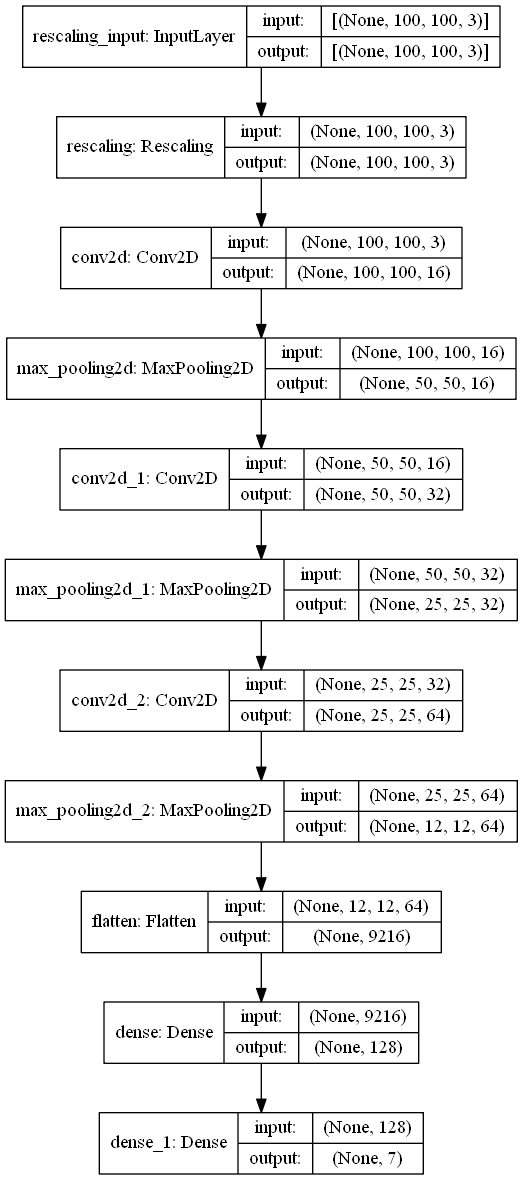

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, show_layer_names=True)

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

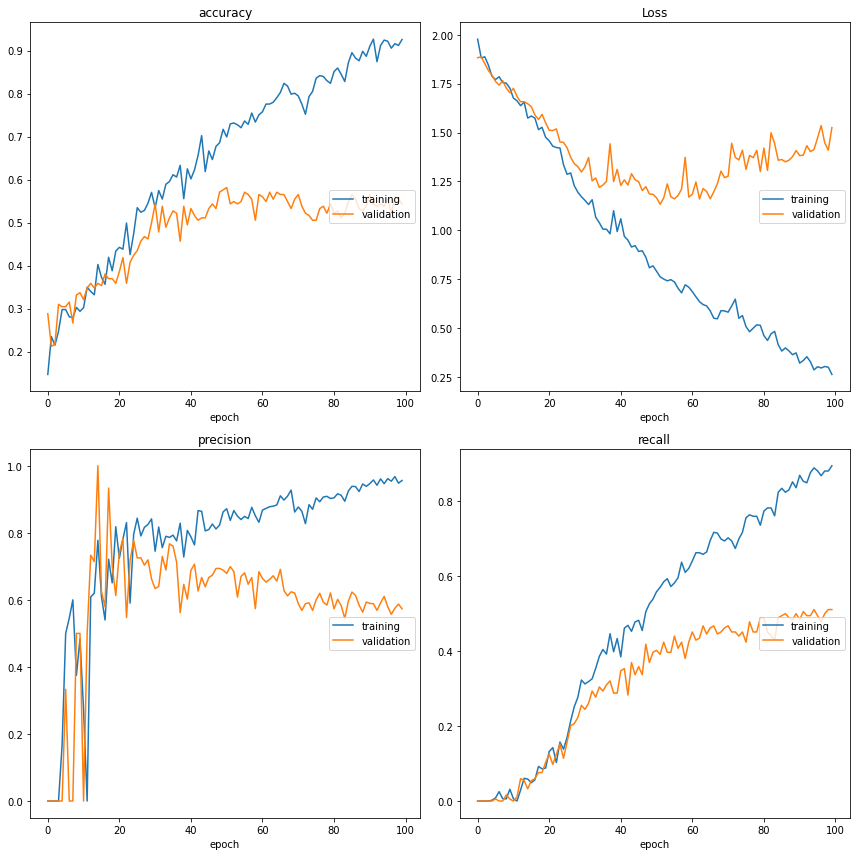

accuracy
	training         	 (min:    0.147, max:    0.927, cur:    0.926)
	validation       	 (min:    0.212, max:    0.582, cur:    0.543)
Loss
	training         	 (min:    0.262, max:    1.978, cur:    0.262)
	validation       	 (min:    1.133, max:    1.887, cur:    1.525)
precision
	training         	 (min:    0.000, max:    0.968, cur:    0.956)
	validation       	 (min:    0.000, max:    1.000, cur:    0.573)
recall
	training         	 (min:    0.000, max:    0.895, cur:    0.895)
	validation       	 (min:    0.000, max:    0.511, cur:    0.511)


In [12]:
history = model.fit(
  train_generator,
  validation_data=val_generator,
  callbacks=[PlotLossesKerasTF()],
  epochs=EPOCHS,
  steps_per_epoch=train_generator.n // train_generator.batch_size,
  validation_steps=val_generator.n // val_generator.batch_size
)

In [13]:
evaluations = model.evaluate(val_generator, verbose=0)

for evaluation, metric_name in zip(evaluations, model.metrics_names):
  print(f"{metric_name}: {evaluation}")

loss: 1.5251586437225342
accuracy: 0.54347825050354
precision: 0.5731707215309143
recall: 0.510869562625885


In [17]:
raw_pred = model.predict(val_generator)
print(raw_pred.shape)

(184, 7)


In [18]:
pred = np.argmax(raw_pred, axis=1)
print(pred)

[5 6 4 0 4 1 2 6 5 1 1 1 4 2 6 1 1 6 6 6 2 6 1 0 6 1 1 2 2 1 5 1 2 0 5 3 0
 2 2 0 6 1 2 1 6 1 6 0 6 0 1 5 6 2 6 2 2 2 0 6 0 6 1 4 6 5 1 6 4 1 6 2 6 0
 2 2 1 0 4 4 4 6 6 6 0 6 6 1 4 4 0 0 6 5 1 2 1 6 5 6 1 4 6 1 3 2 1 0 1 6 6
 5 2 0 4 0 2 0 6 6 6 6 0 3 2 1 0 1 6 1 2 0 2 2 4 6 2 6 1 6 0 4 2 3 2 1 3 2
 2 6 1 1 0 6 5 6 2 1 1 2 6 1 1 6 5 2 2 4 6 1 0 2 2 2 4 2 2 1 0 2 5 4 1 6]


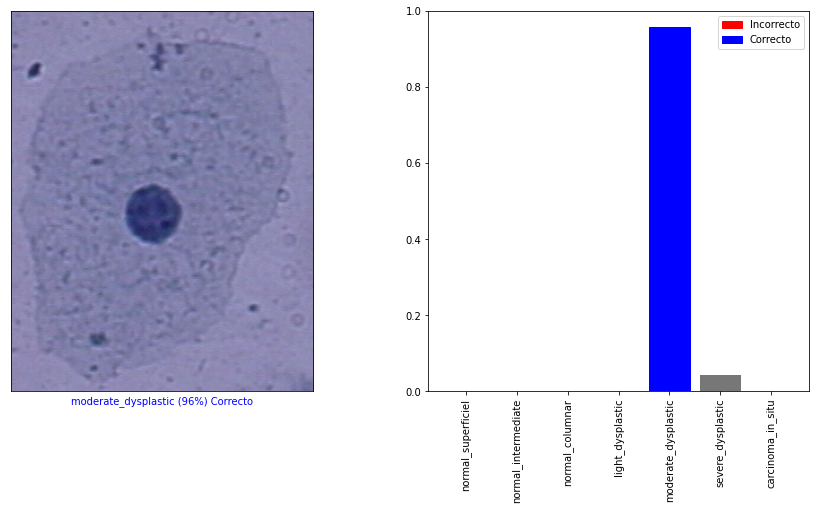

In [53]:
i = 2
utils.plot_softmax(i, raw_pred[i], val_generator.labels, val_generator.filenames, class_names)

![Aumento de datos o generación de datos artificiales](imagenes/augmentation.png "Generación de datos artificiales")

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip(),
    # tf.keras.layers.RandomRotation(0.9, fill_mode="constant"),
    # tf.keras.layers.RandomZoom(0.4, fill_mode="constant"),
  ]
)

In [ ]:
plt.figure(figsize=(10,10))
batch = train_generator.next()
image_ = batch[0].astype('uint8')
for i in range(9):
  plt.subplot(3, 3, i + 1)
  augmented = data_augmentation(image_[0])
  plt.imshow(data_augmentation(image_[0]).numpy().astype('uint8'))
  plt.axis("off")
  # plt.title(class_names[np.argmax(label, axis=0)])
plt.show()

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=IMG_SHAPE),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(OUTPUT_NEURONS, activation=OUTPUT_ACTIVATION)
])

model.compile(optimizer=OPT, loss=LOSS, metrics=METRICS)

In [ ]:
history = model.fit(
  train_generator,
  validation_data=val_generator,
  callbacks=[PlotLossesKerasTF()],
  epochs=EPOCHS,
  steps_per_epoch=train_generator.n // train_generator.batch_size,
  validation_steps=val_generator.n // val_generator.batch_size
)

In [ ]:
evaluations = model.evaluate(val_generator, verbose=0)

for evaluation, metric_name in zip(evaluations, model.metrics_names):
  print(f"{metric_name}: {evaluation}")